Nama :Muhamad Abdulah Ridwan
Kelas : Pagi C
Nim : 221351084

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Pinjaman.csv')


In [4]:
df.head()

,Usia,Pendapatan,Status_Perkawinan,Jumlah_Pinjaman,Durasi_Pinjaman,Status_Pekerjaan,Lulus_Kredit
0,25,40,Belum Menikah,50,5,Karyawan Tetap,Tidak Layak
1,45,100,Menikah,80,10,Wirausaha,Layak
2,35,60,Menikah,100,15,Karyawan Kontrak,Tidak Layak
3,28,75,Belum Menikah,60,7,Karyawan Tetap,Layak
4,50,120,Menikah,150,20,Wirausaha,Layak


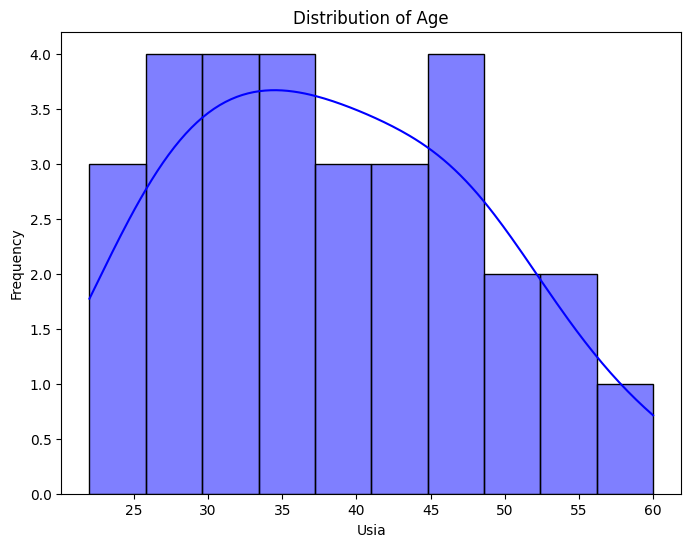

In [5]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Usia'], bins=10, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Usia')
plt.ylabel('Frequency')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17708\197799919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lulus_Kredit', y='Pendapatan', data=df, palette='Set1')


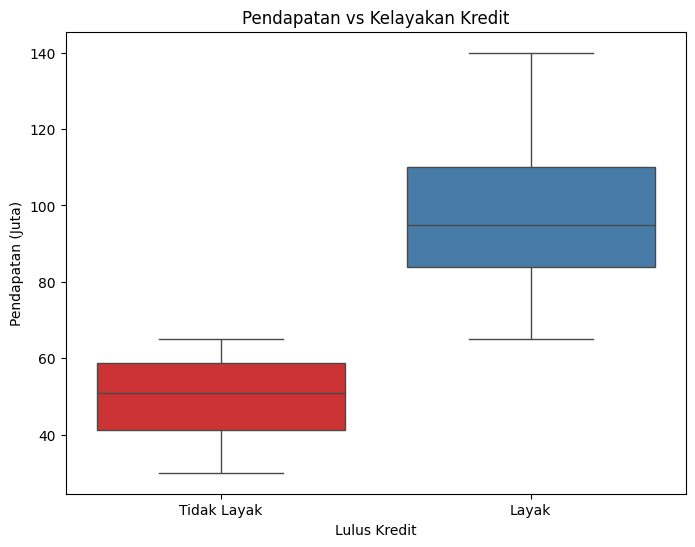

In [6]:
# Boxplot of Income (Pendapatan) vs Lulus Kredit
plt.figure(figsize=(8, 6))
sns.boxplot(x='Lulus_Kredit', y='Pendapatan', data=df, palette='Set1')
plt.title('Pendapatan vs Kelayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Pendapatan (Juta)')
plt.xticks(ticks=[0, 1], labels=['Tidak Layak', 'Layak'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17708\1907440178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status_Perkawinan', data=df, palette='Set2')


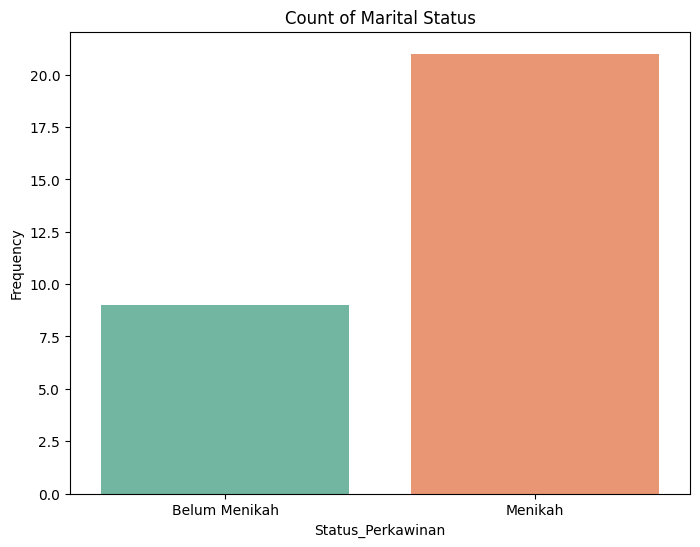

In [7]:
# Countplot of Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Status_Perkawinan', data=df, palette='Set2')
plt.title('Count of Marital Status')
plt.xticks(ticks=[0, 1], labels=['Belum Menikah', 'Menikah'])
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

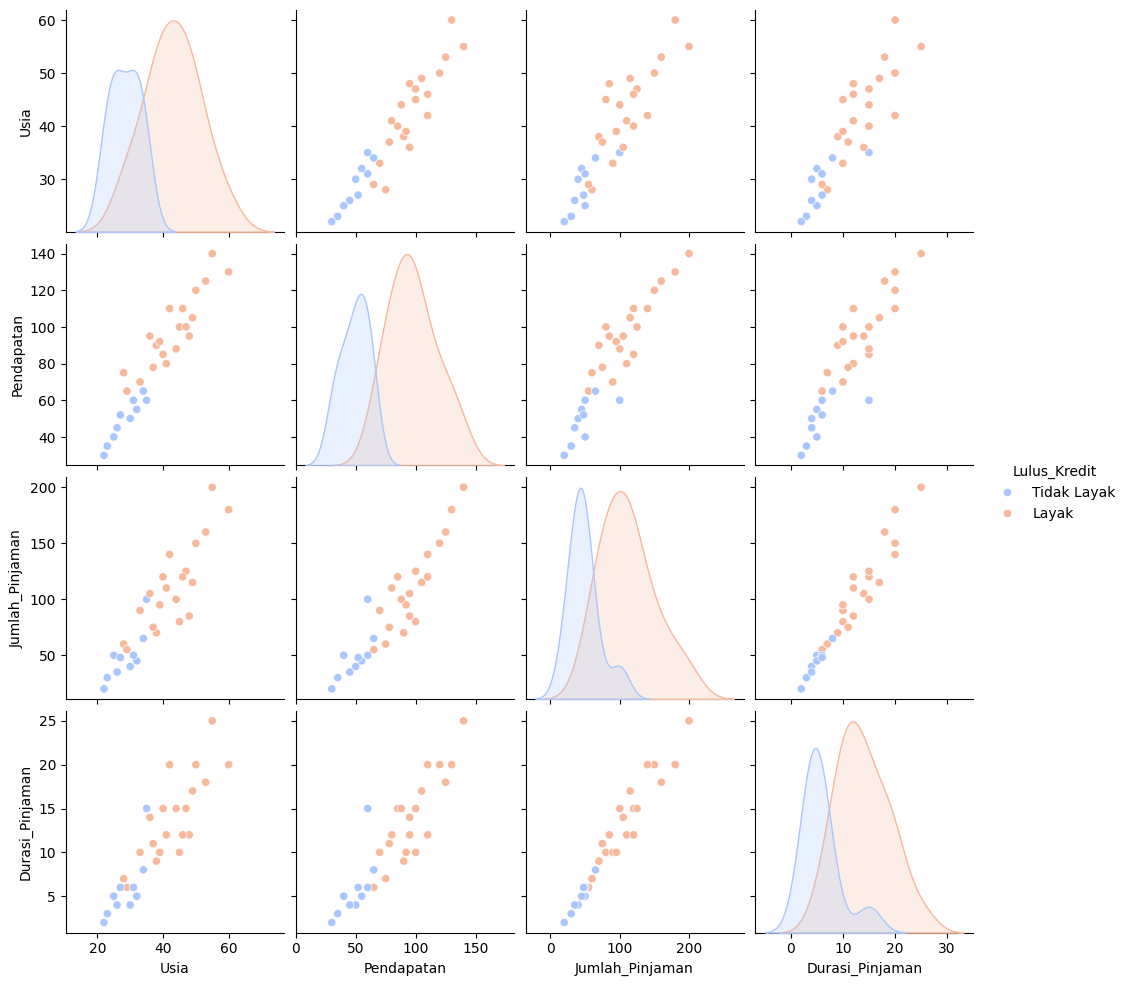

In [8]:
# Pairplot for numerical features
plt.figure(figsize=(8, 6))
sns.pairplot(df[['Usia', 'Pendapatan', 'Jumlah_Pinjaman', 'Durasi_Pinjaman', 'Lulus_Kredit']],
             hue='Lulus_Kredit', palette='coolwarm')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17708\2495913498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Lulus_Kredit', y='Jumlah_Pinjaman', data=df, palette='Set2')


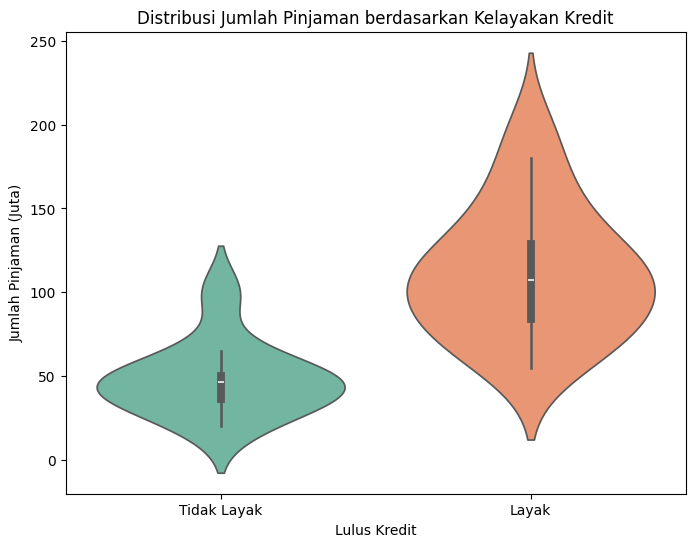

In [9]:
# Violin plot of Loan Amount vs Credit Eligibility
plt.figure(figsize=(8, 6))
sns.violinplot(x='Lulus_Kredit', y='Jumlah_Pinjaman', data=df, palette='Set2')
plt.title('Distribusi Jumlah Pinjaman berdasarkan Kelayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Jumlah Pinjaman (Juta)')
plt.xticks(ticks=[0, 1], labels=['Tidak Layak', 'Layak'])
plt.show()

In [10]:
# Label Encoding
label_encoder_status_perkawinan = LabelEncoder()
label_encoder_status_pekerjaan = LabelEncoder()
label_encoder_lulus_kredit = LabelEncoder()

In [14]:
df['Status_Perkawinan']= label_encoder_status_perkawinan.fit_transform(df['Status_Perkawinan'])
df['Status_Pekerjaan']= label_encoder_status_pekerjaan.fit_transform(df['Status_Pekerjaan'])
df['Lulus_Kredit']= label_encoder_lulus_kredit.fit_transform(df['Lulus_Kredit'])

In [16]:
df.to_csv('pinjaman_modif.csv', index = False)

In [17]:
#splitting the dataset info features and label
x = df.drop(columns=['Lulus_Kredit'])
y = df['Lulus_Kredit']

In [31]:
#splitting data into training and testing sets (80% train,20% test)
X_train, X_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2,random_state=42)

In [32]:
# creating and training the knn model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Predicting the test data
y_pred = knn_model.predict(X_test)


In [36]:
# Simulasi Algoritma KNN
# Example input data:
# Usia: 30, Pendapatan: 80, Status Perkawinan: 0 (Belum Menikah), 
# Jumlah Pinjaman: 70, Durasi Pinjaman: 10, Status Pekerjaan: 1 (Karyawan Tetap)
new_data = np.array([[30, 80, 0, 70, 10, 1]])
new_pred =knn_model.predict(new_data)


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [40]:
# Print the prediction result
print('Hasil prediksi: ', new_pred)

Hasil prediksi:  [0]


In [42]:
label_encoder_lulus_kredit.inverse_transform(new_pred)

array(['Layak'], dtype=object)

In [43]:
#calculating theacuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

In [44]:

# Menyimpan model KNN ke dalam file .pkl
import pickle

filename = 'knn_pinjam_mod.pkl'
pickle.dump(knn_model, open(filename, 'wb'))
